In [1]:
from calculator.KmerProcessor import KmerProcessor
from graph.BruijnGraphBuilder import BruijnGraphBuilder
from graph.GraphVisualizer import GraphVisualizer
from calculator.EulerianPath import EulerianPath
from calculator.DNAAssembler import DNAAssembler

In [2]:
sequences = ["AGTC", "GTCA", "TCAG", "CAGT", "AGTT", "GTTG"]
k = 4

#### Generación de k-mers

En esta sección, utilizamos la clase `KmerProcessor` para generar los k-mers a partir de las secuencias de ADN proporcionadas. La clase toma como entrada las secuencias y el tamaño `k` de los k-mers, generando una lista de substrings de longitud `k` que representan todos los k-mers posibles en las secuencias de entrada. Esta operación es un paso inicial crucial para construir el grafo de De Bruijn.

In [3]:
kmer_processor = KmerProcessor(sequences, k)
kmers = kmer_processor.generate_kmers()

#### Construcción del Grafo de De Bruijn

Se hace uso de la clase `BruijnGraphBuilder` para construir el grafo de De Bruijn a partir de los k-mers generados previamente. La clase `BruijnGraphBuilder` toma los k-mers como entrada y crea un grafo dirigido en el que cada nodo representa un prefijo o sufijo de un k-mer, y cada arista representa una transición entre ellos. Este grafo será fundamental para identificar el camino euleriano necesario para ensamblar la secuencia de ADN original.


In [4]:
graph_builder = BruijnGraphBuilder(kmers)
graph_dict, nx_graph = graph_builder.build_graph()

#### Visualización del Grafo de De Bruijn

La clase `GraphVisualizer` se utiliza para mostrar el grafo de De Bruijn construido a partir de los k-mers. La clase `GraphVisualizer` recibe el grafo de `networkx` como entrada y lo representa gráficamente, permitiendo visualizar las conexiones entre nodos (prefijos y sufijos de los k-mers). Esta visualización ayuda a entender la estructura del grafo y las relaciones entre los distintos k-mers generados.


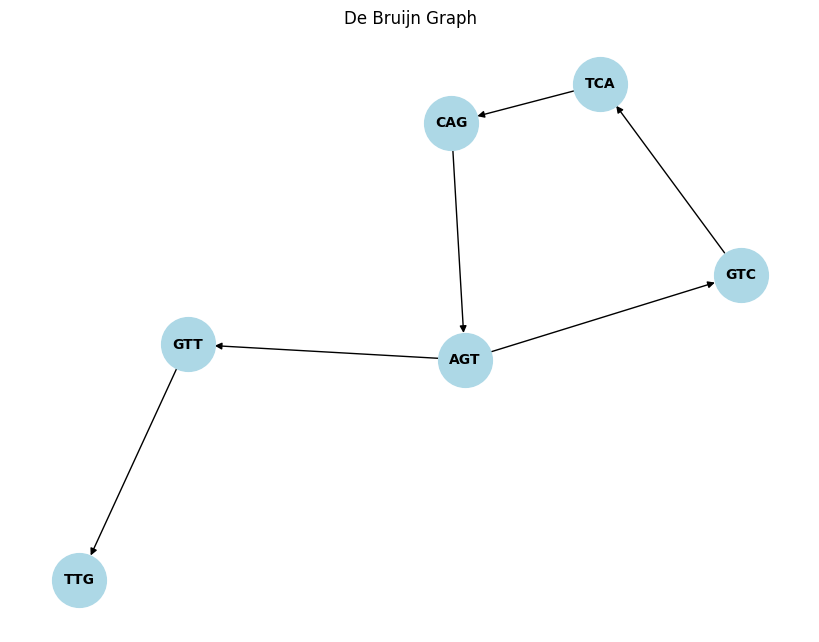

In [5]:
graph_visualizer = GraphVisualizer(nx_graph)
graph_visualizer.display_graph()

### Cálculo del Camino Euleriano

En esta sección, utilizamos la clase `EulerianPath` para calcular el camino euleriano en el grafo de De Bruijn. Esta clase implementa dos métodos: `find_path_manual`, que encuentra el camino euleriano de forma manual, y `find_path_nx`, que utiliza la función `eulerian_path` de la biblioteca `networkx`. El camino euleriano representa la secuencia que conecta todos los nodos del grafo sin repetir aristas, lo cual es fundamental para reconstruir la secuencia de ADN original.


In [6]:
path_finder = EulerianPath(graph_dict, nx_graph)
manual_path = path_finder.find_path_manual()
nx_path = path_finder.find_path_nx()

In [7]:
print("Camino Euleriano - Manual:", manual_path)
print("Camino Euleriano - NetworkX:", nx_path)

Camino Euleriano - Manual: ['AGT', 'GTC', 'TCA', 'CAG', 'AGT', 'GTT', 'TTG']
Camino Euleriano - NetworkX: ['AGT', 'GTC', 'TCA', 'CAG', 'AGT', 'GTT', 'TTG']


#### Ensamblaje de la Secuencia de ADN

`DNAAssembler` reconstruye la secuencia de ADN original a partir del camino euleriano obtenido. La clase toma el camino euleriano (ya sea el calculado manualmente o el generado por `networkx`) y ensambla la secuencia de ADN siguiendo el orden de los nodos en el camino. Finalmente, imprimimos las secuencias ensambladas utilizando ambos métodos de cálculo para verificar que se obtienen resultados consistentes.


In [8]:
assembler_manual = DNAAssembler(manual_path).assemble_sequence()
assembler_nx = DNAAssembler(nx_path).assemble_sequence()

print("Secuencia ensamblada con camino manual:", assembler_manual)
print("Secuencia ensamblada con camino calculado con Network:", assembler_nx)

Secuencia ensamblada con camino manual: AGTCAGTTG
Secuencia ensamblada con camino calculado con Network: AGTCAGTTG
